<a href="https://colab.research.google.com/github/atikhasan007/Knowledge-Engineering/blob/main/Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#K-means Clustering


In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

In [2]:
#Data set
data = [
    ("Rajbir","Inception",5),
    ("Rajbir","Avatar",4),
    ("Saurav","Inception",4),
    ("Saurav","Titanic", 5),
    ("Rahat","Avatar",6),
    ("Rahat","Titanic",4),
    ("Aysha","Inception",5),
    ("Aysha","Joker",6),
    ("Sha","joker",7),
    ("Sha","Titanic",6)
]

In [3]:
df= pd.DataFrame(data,columns=["Name","Movie","Rating"])
print(df)

     Name      Movie  Rating
0  Rajbir  Inception       5
1  Rajbir     Avatar       4
2  Saurav  Inception       4
3  Saurav    Titanic       5
4   Rahat     Avatar       6
5   Rahat    Titanic       4
6   Aysha  Inception       5
7   Aysha      Joker       6
8     Sha      joker       7
9     Sha    Titanic       6


In [4]:
#Create bipartie graph
B = nx.Graph()
for person, movie, rating in data:
    B.add_node(person, bipartite=0)
    B.add_node(movie, bipartite=1)
    B.add_edge(person, movie, weight=rating)

In [5]:
# Separate the sets based on bipartite attribute
people_nodes = [n for n, d in B.nodes(data=True) if d['bipartite'] == 0]
movie_nodes  = [n for n, d in B.nodes(data=True) if d['bipartite'] == 1]


In [6]:
# Layout for bipartite
pos = dict()
pos.update((node, (0, i)) for i, node in enumerate(people_nodes))
pos.update((node, (1, i)) for i, node in enumerate(movie_nodes))
print(pos)

{'Rajbir': (0, 0), 'Saurav': (0, 1), 'Rahat': (0, 2), 'Aysha': (0, 3), 'Sha': (0, 4), 'Inception': (1, 0), 'Avatar': (1, 1), 'Titanic': (1, 2), 'Joker': (1, 3), 'joker': (1, 4)}


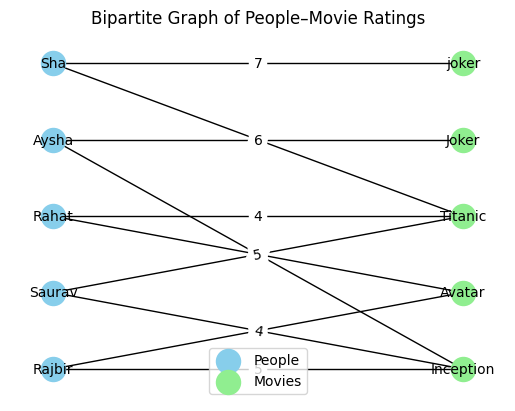

In [7]:
# Draw nodes
nx.draw_networkx_nodes( B, pos, nodelist=people_nodes, node_color="skyblue",  label="People")
nx.draw_networkx_nodes(B,  pos, nodelist=movie_nodes, node_color="lightgreen",  label="Movies")

# Draw edges with labels for ratings
nx.draw_networkx_edges(B, pos)
edge_labels = nx.get_edge_attributes(B, 'weight')
nx.draw_networkx_edge_labels(B, pos, edge_labels=edge_labels)

# Draw node labels
nx.draw_networkx_labels(B, pos, font_size=10)

plt.axis('off')
plt.legend()
plt.title("Bipartite Graph of People–Movie Ratings")
plt.show()

In [8]:
# Create person–movie rating matrix
persons = sorted(set(df["Name"]))
movies = sorted(set(df["Movie"]))
rating_matrix = pd.DataFrame(0, index=persons, columns=movies)

for _, row in df.iterrows():
    rating_matrix.loc[row["Name"], row["Movie"]] = row["Rating"]
print(rating_matrix)

        Avatar  Inception  Joker  Titanic  joker
Aysha        0          5      6        0      0
Rahat        6          0      0        4      0
Rajbir       4          5      0        0      0
Saurav       0          4      0        5      0
Sha          0          0      0        6      7


In [9]:
# K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(rating_matrix)
cluster_map = dict(zip(persons, clusters))
print(cluster_map)

{'Aysha': np.int32(0), 'Rahat': np.int32(0), 'Rajbir': np.int32(0), 'Saurav': np.int32(0), 'Sha': np.int32(1)}


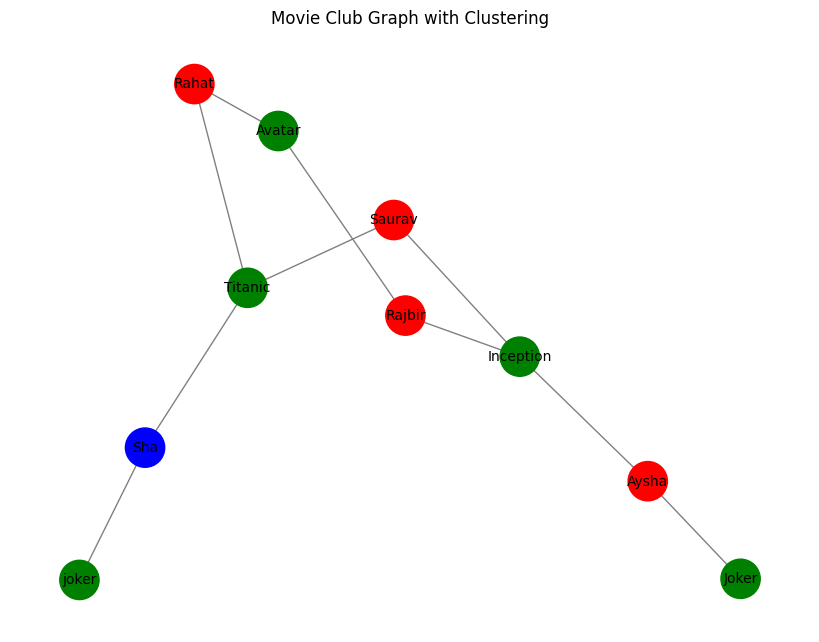

In [10]:
# Visualization
pos = nx.spring_layout(B, seed=42)
node_colors = []
for node in B.nodes():
    if node in cluster_map:  # person node
        node_colors.append("red" if cluster_map[node] == 0 else "blue")
    else:
        node_colors.append("green")  # movie node

plt.figure(figsize=(8,6))
nx.draw(B, pos, with_labels=True, node_color=node_colors, edge_color="gray", node_size=800, font_size=10)
plt.title("Movie Club Graph with Clustering")
plt.show()